# Collaborative-Based Filtering

### Load the data

In [85]:
import pandas
ratings = pandas.read_csv("ratings.csv")[["userId", "movieId", "rating"]]
ratings.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


### Create the dataset

In [86]:
from surprise import Dataset, Reader

reader = Reader(rating_scale=(1,5))
dataset = Dataset.load_from_df(ratings, reader)
dataset

### Build the trainset

In [87]:
trainset = dataset.build_full_trainset()

### Train the Model

In [88]:
from surprise import SVD

svd = SVD()

In [89]:
svd.fit(trainset)

In [90]:
svd.predict(15, 1956)

Prediction(uid=15, iid=1956, r_ui=None, est=3.346660661470165, details={'was_impossible': False})

### Validation

In [91]:
from surprise import model_selection

cv_results = model_selection.cross_validate(svd, dataset, measures=["RMSE", "MAE"])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=48f880f8-2f58-41e7-b0c8-ce2863059d0d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

# Extract the results

In [92]:
import os
os.makedirs('plots/collaborative', exist_ok=True)

In [93]:
import matplotlib.pyplot as plt

# Plot RMSE across folds

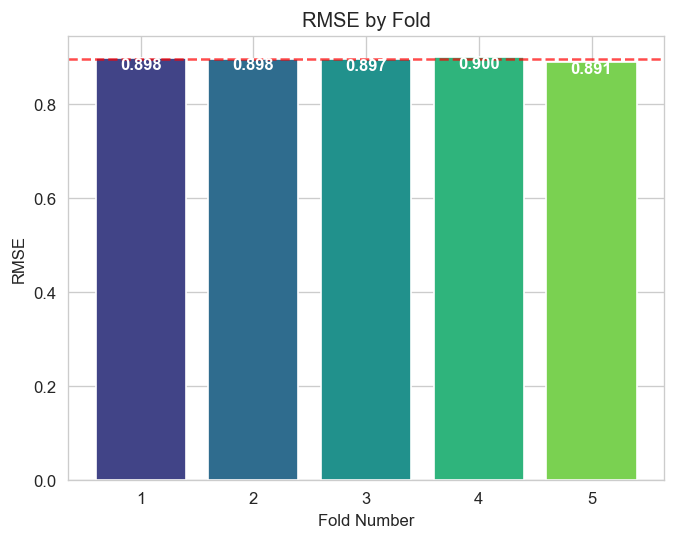

In [94]:
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.bar(range(1, 6), test_rmse, 
       color=plt.cm.viridis(np.linspace(0.2, 0.8, 5)),
       edgecolor='white', linewidth=1)
for i, v in enumerate(test_rmse):
    ax.text(i+1, v-0.03, f'{v:.3f}', ha='center', va='bottom', color='white', fontweight='bold')
ax.axhline(y=np.mean(test_rmse), color='red', linestyle='--', alpha=0.7)
ax.set_title('RMSE by Fold')
ax.set_xlabel('Fold Number')
ax.set_ylabel('RMSE')
fig1.savefig('plots/collaborative/rmse_by_fold.png', bbox_inches='tight', facecolor='white')
plt.show()
plt.close(fig1)

# MAE across folds

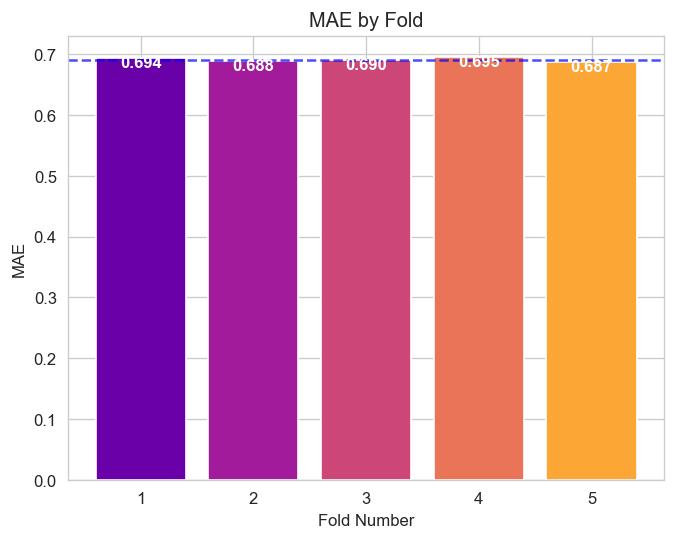

In [95]:
fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax.bar(range(1, 6), test_mae, 
       color=plt.cm.plasma(np.linspace(0.2, 0.8, 5)),
       edgecolor='white', linewidth=1)
for i, v in enumerate(test_mae):
    ax.text(i+1, v-0.02, f'{v:.3f}', ha='center', va='bottom', color='white', fontweight='bold')
ax.axhline(y=np.mean(test_mae), color='blue', linestyle='--', alpha=0.7)
ax.set_title('MAE by Fold')
ax.set_xlabel('Fold Number')
ax.set_ylabel('MAE')
fig2.savefig('plots/collaborative/mae_by_fold.png', bbox_inches='tight', facecolor='white')
plt.show()
plt.close(fig2)

# Timing information

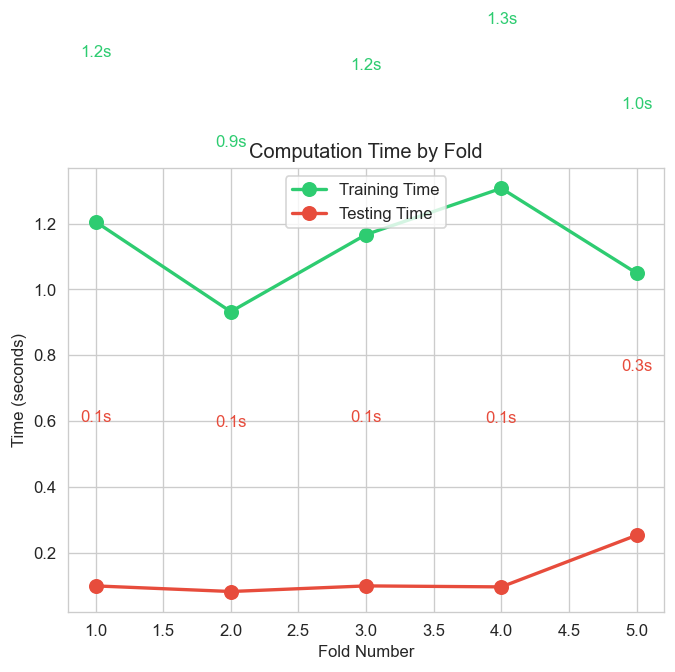

In [96]:
fig3 = plt.figure()
ax = fig3.add_subplot(111)
ax.plot(range(1, 6), fit_times, 'o-', color='#2ecc71', markersize=8, linewidth=2, label='Training Time')
ax.plot(range(1, 6), test_times, 'o-', color='#e74c3c', markersize=8, linewidth=2, label='Testing Time')
for i, (fit, test) in enumerate(zip(fit_times, test_times)):
    ax.text(i+1, fit+0.5, f'{fit:.1f}s', ha='center', color='#2ecc71')
    ax.text(i+1, test+0.5, f'{test:.1f}s', ha='center', color='#e74c3c')
ax.set_title('Computation Time by Fold')
ax.set_xlabel('Fold Number')
ax.set_ylabel('Time (seconds)')
ax.legend()
fig3.savefig('plots/collaborative/computation_time.png', bbox_inches='tight', facecolor='white')
plt.show()
plt.close(fig3)

# Overall metrics

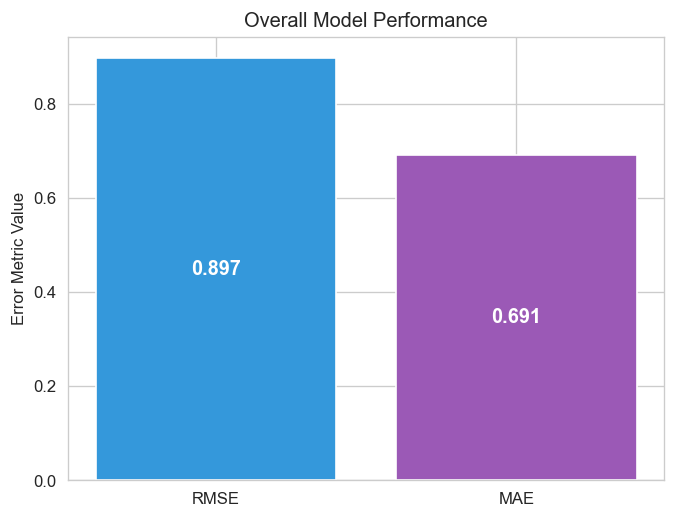

In [97]:
fig4 = plt.figure()
ax = fig4.add_subplot(111)
metrics = ['RMSE', 'MAE']
values = [np.mean(test_rmse), np.mean(test_mae)]
colors = ['#3498db', '#9b59b6']
ax.bar(metrics, values, color=colors, edgecolor='white', linewidth=1)
for i, val in enumerate(values):
    ax.text(i, val/2, f'{val:.3f}', ha='center', va='center', color='white', fontweight='bold', fontsize=12)
ax.set_title('Overall Model Performance')
ax.set_ylabel('Error Metric Value')
fig4.savefig('plots/collaborative/overall_metrics.png', bbox_inches='tight', facecolor='white')
plt.show()
plt.close(fig4)


# Print summary statistics

In [98]:
print("\nEvaluation Summary:")
print(f"Average RMSE: {np.mean(test_rmse):.4f} (Lower is better)")
print(f"Average MAE: {np.mean(test_mae):.4f} (Lower is better)")
print(f"Average Training Time: {np.mean(fit_times):.2f} sec per fold")
print(f"Average Testing Time: {np.mean(test_times):.2f} sec per fold")
print("\nInterpretation:")
print("RMSE gives more weight to large errors, while MAE treats all errors equally.")
print("Times show the computational efficiency of the model during training and prediction.")


Evaluation Summary:
Average RMSE: 0.8969 (Lower is better)
Average MAE: 0.6908 (Lower is better)
Average Training Time: 1.13 sec per fold
Average Testing Time: 0.13 sec per fold

Interpretation:
RMSE gives more weight to large errors, while MAE treats all errors equally.
Times show the computational efficiency of the model during training and prediction.
